In [11]:
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd
import nltk
import numpy as np
import datetime,time
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlopen
from scholarly import scholarly
import scrapy
import mechanize
import nltk
from bs4 import BeautifulSoup
from html2text import html2text 
import re
from scraper_api import ScraperAPIClient
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from GoogleScraper import scrape_with_config, GoogleSearchError

# Author Scapper
scholarly library is a module that allows you to retrieve author and publication information from Google Scholar in a friendly, Pythonic way.

In [12]:
# Scrapping by Key words
search_query = scholarly.search_keyword('Haptics')
print(next(search_query))

{'affiliation': 'Postdoctoral research assistant, University of Bremen',
 'citedby': 56619,
 'email': '@collision-detection.com',
 'filled': False,
 'id': 'lHrs3Y4AAAAJ',
 'interests': ['Computer Graphics',
               'Collision Detection',
               'Haptics',
               'Geometric Data Structures'],
 'name': 'Rene Weller',
 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=lHrs3Y4AAAAJ'}


In [18]:
# Scrapping by Name
print(next(scholarly.search_author('Steven A. Cholewiak')))

{'affiliation': 'Vision Scientist',
 'citedby': 303,
 'email': '@berkeley.edu',
 'filled': False,
 'id': '4bahYMkAAAAJ',
 'interests': ['Depth Cues',
               '3D Shape',
               'Shape from Texture & Shading',
               'Naive Physics',
               'Haptics'],
 'name': 'Steven A. Cholewiak, PhD',
 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=4bahYMkAAAAJ'}


# Working with Scrapy

# Defining all the functions

In [8]:
#Defining a funtion that cleans up all html indendations from a provided html (should be in a string format)

def clean_html(html):
    """
    Copied from NLTK package.
    Remove HTML markup from the given string.

    :param html: the HTML string to be cleaned
    :type html: str
    :rtype: str
    """

    # First we remove inline JavaScript/CSS:
    cleaned = re.sub(r"(?is)<(script|style).*?>.*?(</\1>)", "", html.strip())
    # Then we remove html comments. This has to be done before removing regular
    # tags since comments can contain '>' characters.
    cleaned = re.sub(r"(?s)<!--(.*?)-->[\n]?", "", cleaned)
    # Next we can remove the remaining tags:
    cleaned = re.sub(r"(?s)<.*?>", " ", cleaned)
    # Finally, we deal with whitespace
    cleaned = re.sub(r"&nbsp;", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    return cleaned.strip()


# Defining a function to get results from Google Scholar and clean it. Have to pass the word, Only 2 pages for now

def Pages_Data(Word):
    
    Pages=[]
    for i in range(1,6):
        Pages.append(i)
        Google_Scholar_Link="https://scholar.google.com/scholar?start={}0&q={}&hl=en&as_sdt=0,26".format(i,Word)
        client = ScraperAPIClient('079c1bd8f4bfc53360b90638c7af35dd')
        Pages[i-1] = clean_html(client.get(url = Google_Scholar_Link).text)
    return Pages


from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
def WebSearch(Word):
    # See in the config.cfg file for possible values
    config = {
        'use_own_ip': True,
        'keyword': Word,
        'search_engines': ['Google', 'bing'],
        'num_pages_for_keyword': 1,
        'scrape_method': 'http',
        'sel_browser': 'chrome',
        'do_caching': False
    }

    try:
        Results = scrape_with_config(config).serps
    except GoogleSearchError as e:
        print(e)

    # let's inspect what we got
    return Results 



#  Google Scholar Search


Please Enter the search word on Google Scholar: corona virus in adults


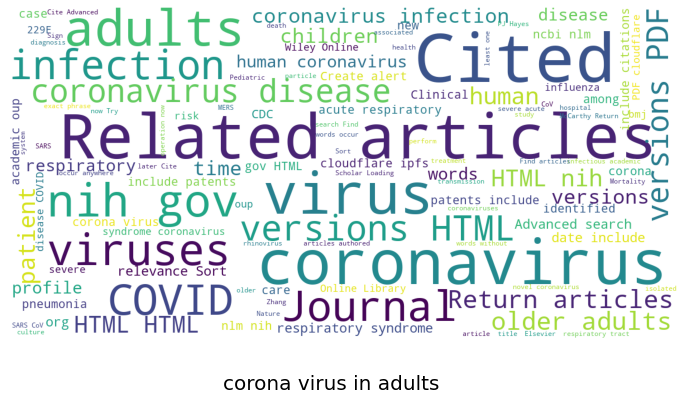

In [31]:
# Enter the search word and get results from 5 pages of Google Scholar
Input=input("Please Enter the search word on Google Scholar: ")
if len(Input)>1:
    Word='+'.join(Input.split())
else:
    Word=Input
Data="".join(Pages_Data(Word))
show_wordcloud(Data, title = Input)

#  Internet Web Search


In [30]:
# Enter the search word and get results from 5 pages of Google and Bing
Input=input("Please Enter the search word on Web Search Engines: ")

Results=WebSearch(Input)

for serp in Results:
        print(serp)
        print(serp.search_engine_name)
        print(serp.scrape_method)
        print(serp.page_number)
        print(serp.requested_at)
        print(serp.num_results)
        # ... more attributes ...
        for link in serp.links:
            print(link)

Please Enter the search word on Web Search Engines: Saad Siddique


[MainThread] - 2020-10-26 15:02:59,069 - GoogleScraper.core - INFO - Going to scrape 2 keywords with 1 proxies by using 2 threads.
[MainThread] - 2020-10-26 15:02:59,072 - GoogleScraper.scraping - INFO - [+] HttpScrape[localhost][search-type:normal][http://www.bing.com/search?] using search engine "bing". Num keywords=1, num pages for keyword=[1]
[MainThread] - 2020-10-26 15:02:59,074 - GoogleScraper.scraping - INFO - [+] HttpScrape[localhost][search-type:normal][https://www.google.com/search?] using search engine "google". Num keywords=1, num pages for keyword=[1]
[Thread-26] - 2020-10-26 15:03:00,077 - GoogleScraper.scraping - INFO - [HttpScrape-bing][localhost]]Keyword: "Saad Siddique" with [1] pages, slept 1 seconds before scraping. 1/1 already scraped.
[Thread-27] - 2020-10-26 15:03:00,085 - GoogleScraper.scraping - INFO - [HttpScrape-google][localhost]]Keyword: "Saad Siddique" with [1] pages, slept 1 seconds before scraping. 1/1 already scraped.


{'effective_query': '',
 'id': '11',
 'no_results': 'True',
 'num_results': '11',
 'num_results_for_query': '110,000 results',
 'page_number': '1',
 'query': 'Saad Siddique',
 'requested_at': '2020-10-26 20:03:00.725825',
 'requested_by': 'localhost',
 'results': [{'domain': 'www.imdb.com',
              'id': '62',
              'link': 'https://www.imdb.com/name/nm2576356/',
              'link_type': 'results',
              'num_reviews': 'None',
              'rank': '1',
              'rating': 'None',
              'serp_id': '11',
              'snippet': 'None',
              'title': 'Saad Siddiqui - IMDb',
              'visible_link': 'https://www.imdb.com/name/nm2576356'},
             {'domain': 'www.linkedin.com',
              'id': '63',
              'link': 'https://www.linkedin.com/in/saad-siddique-90517430',
              'link_type': 'results',
              'num_reviews': 'None',
              'rank': '2',
              'rating': 'None',
              'serp_id': 

{'effective_query': '',
 'id': '12',
 'no_results': 'False',
 'num_results': '1',
 'num_results_for_query': '0',
 'page_number': '1',
 'query': 'Saad Siddique',
 'requested_at': '2020-10-26 20:03:00.986897',
 'requested_by': 'localhost',
 'results': [{'domain': "b''",
              'id': '73',
              'link': 'None',
              'link_type': 'results',
              'num_reviews': 'None',
              'rank': '1',
              'rating': 'None',
              'serp_id': '12',
              'snippet': 'None',
              'title': 'None',
              'visible_link': 'www.facebook.com › public › Saad-Siddique'}],
 'scrape_method': 'http',
 'search_engine_name': 'google',
 'status': 'successful'}
<SERP[bing] has [11] link results for query "Saad Siddique">
bing
http
1
2020-10-26 20:03:00.725825
11
<Link at rank 1 has url: https://www.imdb.com/name/nm2576356/>
<Link at rank 2 has url: https://www.linkedin.com/in/saad-siddique-90517430>
<Link at rank 3 has url: https://www.linke